In [1]:
import pandas as pd
import glob
from collections import defaultdict
import numpy as np
import json


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import seaborn as sns
sns.set(style='whitegrid', palette='muted')

from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor, as_completed

In [2]:
!mkdir -p plots

In [3]:
results_dir = "results/1648838189"
result_name = "5000-ce"

In [4]:
# Parameters
result_name = "1000-rr"
results_dir = "results/1648829259"


In [5]:
forecast_files = glob.glob(f"{results_dir}/forecast.*.jsonl")

key_to_timestamps = defaultdict(list)
key_to_last_seqnos = defaultdict(list)
key_to_last_seqno_to_forecast = defaultdict(dict)
for path in tqdm(forecast_files):
    with open(path) as f:
        for line in f:
            loaded = json.loads(line)
            key_id = str(loaded["key_id"])
            key_to_timestamps[key_id].append(loaded["processing_time"])
            key_to_last_seqnos[key_id].append(loaded["last_seqno"])
            key_to_last_seqno_to_forecast[key_id][loaded["last_seqno"]] = loaded["forecast"]


  0%|                                                                       | 0/4 [00:00<?, ?it/s]

 25%|███████████████▊                                               | 1/4 [00:01<00:03,  1.16s/it]

 50%|███████████████████████████████▌                               | 2/4 [00:02<00:02,  1.18s/it]

 75%|███████████████████████████████████████████████▎               | 3/4 [00:03<00:01,  1.17s/it]

100%|███████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.19s/it]

100%|███████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.18s/it]

In [6]:
source_files = glob.glob(f"{results_dir}/source.*.jsonl")
key_to_source_series = defaultdict(list)
key_to_source_timestamps = defaultdict(list)
key_to_source_seqno = defaultdict(list)
for path in source_files:
    with open(path) as f:
        for line in tqdm(f):
            loaded = json.loads(line)
            for entry in loaded:
                key_id = str(entry["key_id"])
                key_to_source_series[key_id].append(entry["value"])
                key_to_source_timestamps[key_id].append(entry["ingest_time"])
                key_to_source_seqno[key_id].append(entry["seq_no"])


0it [00:00, ?it/s]

1it [00:00,  5.15it/s]

71it [00:00, 298.71it/s]

139it [00:00, 441.78it/s]

206it [00:00, 521.36it/s]

273it [00:00, 569.90it/s]

339it [00:00, 596.08it/s]

404it [00:00, 611.33it/s]

468it [00:00, 616.17it/s]

532it [00:01, 621.95it/s]

597it [00:01, 627.75it/s]

661it [00:01, 627.55it/s]

725it [00:01, 605.21it/s]

787it [00:01, 608.61it/s]

851it [00:01, 616.86it/s]

913it [00:01, 614.78it/s]

976it [00:01, 618.72it/s]

1039it [00:01, 615.02it/s]

1102it [00:01, 618.89it/s]

1164it [00:02, 613.40it/s]

1227it [00:02, 617.80it/s]

1289it [00:02, 611.03it/s]

1352it [00:02, 616.19it/s]

1415it [00:02, 619.67it/s]

1477it [00:02, 612.61it/s]

1540it [00:02, 617.17it/s]

1604it [00:02, 621.20it/s]

1667it [00:02, 612.18it/s]

1729it [00:02, 606.71it/s]

1792it [00:03, 612.40it/s]

1854it [00:03, 595.53it/s]

1918it [00:03, 605.83it/s]

1982it [00:03, 613.28it/s]

2044it [00:03, 611.32it/s]

2106it [00:03, 600.74it/s]

2169it [00:03, 609.22it/s]

2232it [00:03, 614.64it/s]

2296it [00:03, 620.17it/s]

2359it [00:03, 607.74it/s]

2423it [00:04, 614.34it/s]

2487it [00:04, 620.43it/s]

2551it [00:04, 624.57it/s]

2616it [00:04, 629.04it/s]

2679it [00:04, 607.94it/s]

2743it [00:04, 616.31it/s]

2807it [00:04, 621.68it/s]

2871it [00:04, 625.22it/s]

2934it [00:04, 626.51it/s]

2997it [00:05, 607.24it/s]

3060it [00:05, 613.15it/s]

3123it [00:05, 617.19it/s]

3186it [00:05, 618.86it/s]

3249it [00:05, 620.33it/s]

3312it [00:05, 621.98it/s]

3375it [00:05, 602.62it/s]

3437it [00:05, 606.27it/s]

3499it [00:05, 609.36it/s]

3561it [00:05, 611.95it/s]

3623it [00:06, 612.31it/s]

3685it [00:06, 608.49it/s]

3747it [00:06, 609.67it/s]

3808it [00:06, 588.65it/s]

3869it [00:06, 594.51it/s]

3931it [00:06, 600.19it/s]

3993it [00:06, 604.69it/s]

4055it [00:06, 606.83it/s]

4117it [00:06, 610.05it/s]

4179it [00:06, 612.65it/s]

4241it [00:07, 593.47it/s]

4301it [00:07, 592.22it/s]

4363it [00:07, 598.21it/s]

4425it [00:07, 602.53it/s]

4487it [00:07, 605.55it/s]

4549it [00:07, 607.54it/s]

4610it [00:07, 604.43it/s]

4672it [00:07, 607.00it/s]

4733it [00:07, 607.58it/s]

4794it [00:07, 581.51it/s]

4855it [00:08, 589.27it/s]

4917it [00:08, 597.32it/s]

4979it [00:08, 602.56it/s]

5041it [00:08, 605.57it/s]

5103it [00:08, 608.46it/s]

5166it [00:08, 612.44it/s]

5229it [00:08, 616.23it/s]

5292it [00:08, 619.10it/s]

5355it [00:08, 620.37it/s]

5418it [00:09, 591.16it/s]

5481it [00:09, 599.56it/s]

5544it [00:09, 605.80it/s]

5607it [00:09, 610.35it/s]

5670it [00:09, 614.47it/s]

5733it [00:09, 616.87it/s]

5795it [00:09, 615.06it/s]

5857it [00:09, 615.91it/s]

5919it [00:09, 609.63it/s]

5980it [00:09, 607.65it/s]

6043it [00:10, 612.93it/s]

6105it [00:10, 577.02it/s]

6167it [00:10, 589.16it/s]

6230it [00:10, 598.56it/s]

6293it [00:10, 605.00it/s]

6355it [00:10, 607.91it/s]

6417it [00:10, 608.36it/s]

6479it [00:10, 609.17it/s]

6541it [00:10, 609.93it/s]

6603it [00:10, 608.91it/s]

6665it [00:11, 609.96it/s]

6727it [00:11, 602.20it/s]

6788it [00:11, 602.07it/s]

6849it [00:11, 539.36it/s]

6909it [00:11, 555.14it/s]

6970it [00:11, 568.87it/s]

7030it [00:11, 577.05it/s]

7090it [00:11, 581.25it/s]

7151it [00:11, 588.01it/s]

7212it [00:12, 593.61it/s]

7273it [00:12, 597.89it/s]

7334it [00:12, 600.89it/s]

7395it [00:12, 602.69it/s]

7456it [00:12, 604.05it/s]

7517it [00:12, 604.56it/s]

7578it [00:12, 605.56it/s]

7639it [00:12, 604.60it/s]

7700it [00:12, 554.35it/s]

7760it [00:12, 566.87it/s]

7818it [00:13, 569.25it/s]

7879it [00:13, 579.87it/s]

7940it [00:13, 586.08it/s]

8001it [00:13, 591.63it/s]

8062it [00:13, 595.94it/s]

8124it [00:13, 600.38it/s]

8185it [00:13, 602.85it/s]

8247it [00:13, 605.34it/s]

8309it [00:13, 606.68it/s]

8371it [00:13, 607.54it/s]

8432it [00:14, 607.91it/s]

8493it [00:14, 608.47it/s]

8555it [00:14, 609.58it/s]

8617it [00:14, 610.87it/s]

8639it [00:14, 599.27it/s]

In [7]:
num_forecasts = pd.DataFrame([
    {"key": k, "num_forecasts": len(v)} for k, v in key_to_last_seqnos.items()
])
num_forecasts.describe()

,num_forecasts
count,771.000000
mean,1.913100
std,0.566577
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


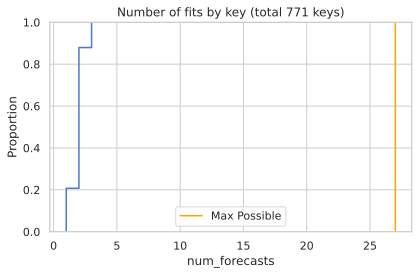

In [8]:
sns.ecdfplot(num_forecasts["num_forecasts"])
plt.title(f"Number of fits by key (total {len(num_forecasts)} keys)")
plt.axvline(27, color="orange", label="Max Possible")
plt.legend()
plt.tight_layout()
plt.savefig(f"plots/{result_name}-nfits.pdf", dpi=300)

In [9]:
num_forecasts.to_csv(f"plots/{result_name}-nfits.csv", index=None)

In [10]:
def compute_key(key):
    pred_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_timestamps[key],
                "last_seqno": key_to_last_seqnos[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )
    true_df = (
        pd.DataFrame(
            {
                "timestamp": key_to_source_timestamps[key],
                "avg_cpu": key_to_source_series[key],
                "seq_no": key_to_source_seqno[key],
            }
        )
        .sort_values("timestamp")
        .set_index("timestamp")
    )

    merged = pd.merge_asof(
        left=true_df, right=pred_df, on="timestamp", direction="backward"
    )

    forecast = key_to_last_seqno_to_forecast[key]
    frame = pd.DataFrame(forecast)
    frame = (
        frame.T.reset_index()
        .melt("index")
        .rename(columns={"variable": "seq_delta", "index": "last_seqno"})
    )

    m = merged.dropna().reset_index(drop=True)
    m.loc[:, "seq_delta"] = (m["seq_no"] - m["last_seqno"]).astype(int)
    final = m.merge(frame, how="left", on=["last_seqno", "seq_delta"])

    mse_per_key_per_s = final.groupby(final["timestamp"].astype(int)).apply(
        lambda d: pd.Series(
            {"mse": ((d["avg_cpu"] - d["value"]) ** 2).mean(), "count": len(d)}
        )
    )
    mse_per_key_per_s["key"] = key
    return mse_per_key_per_s

with ProcessPoolExecutor() as executor:
    futs = executor.map(compute_key, key_to_timestamps.keys())
    mses = list(futs)

In [11]:
# we are dropping some keys here :sigh:
# need to figure out how to handle a key that's never fitted
# final length 4965 for 5000
all_mse = pd.concat([f.reset_index() for f in mses if len(f)])

In [12]:
all_mse.to_parquet(f"plots/{result_name}-all_mse.pq", index=None)

In [13]:
mse_by_timestamp = all_mse.groupby("timestamp").apply(
    lambda d: (d["mse"]*d["count"]).sum()/(d["count"].sum())
)

In [14]:
mse_by_timestamp.index = mse_by_timestamp.index-mse_by_timestamp.index.min()

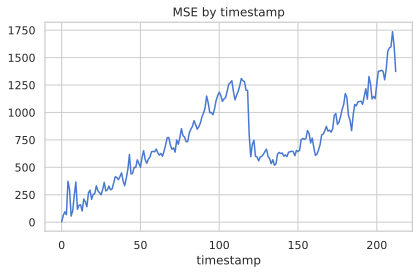

In [15]:
mse_by_timestamp.plot()
plt.title("MSE by timestamp")
plt.tight_layout()
plt.savefig(f"plots/{result_name}-mse-time.pdf", dpi=300)
mse_by_timestamp.to_csv(f"plots/{result_name}-mse-time.csv", index=True)